In [14]:
# imports
import os
import matplotlib.pyplot as plt
import pandas as pd
import ogcore.output_plots as op
import ogcore.output_tables as ot
from ogcore.utils import safe_read_pickle

# set plot style
plt.style.use("ogcore.OGcorePlots")
# set current directory
CUR_DIR = os.getcwd()

In [15]:
# Set path for simulation to use
sim_path = os.path.join(CUR_DIR, "OG-ZAF-nhc")

In [16]:
# read in output from health ins simulation
base_params = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_BASELINE", "model_params.pkl"
        )
    )
base_tpi = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_BASELINE", "TPI", "TPI_vars.pkl"
        )
    )
reform_params = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_REFORM", "model_params.pkl"
        )
    )
reform_tpi = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_REFORM", "TPI", "TPI_vars.pkl"
        )
    )



/var/folders/bw/1cvntf9x02b49nfwgy_qnfn00000gp/T/ipykernel_30807/1941940818.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


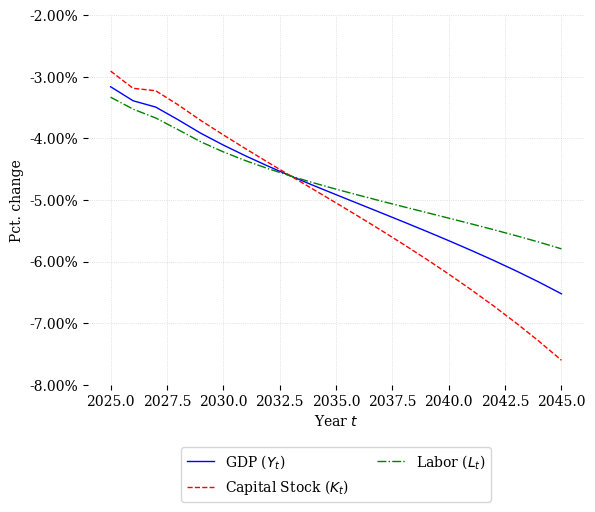

In [17]:
# use a op function to plot pct diff in GDP, K, L
fig = op.plot_aggregates(
    base_tpi,
    base_params,
    reform_tpi=reform_tpi,
    reform_params=reform_params,
    var_list=["Y", "K", "L"],
    plot_type="pct_diff",
    num_years_to_plot=21,
    start_year=base_params.start_year
    )
fig.show()


/var/folders/bw/1cvntf9x02b49nfwgy_qnfn00000gp/T/ipykernel_30807/3243291177.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


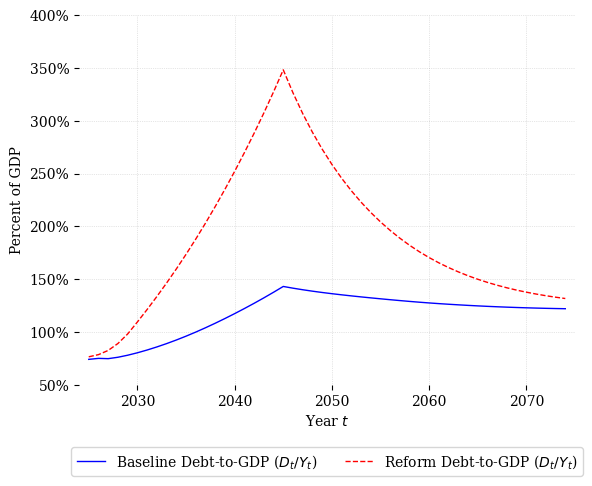

In [18]:
fig = op.plot_gdp_ratio(
    base_tpi,
    base_params,
    reform_tpi=reform_tpi,
    reform_params=reform_params,
    var_list=["D"],
    plot_type="levels",
    num_years_to_plot=50,
    start_year=base_params.start_year,
)
fig.show()

In [19]:
# use a ot function to table
ot.macro_table(
    base_tpi,
    base_params,
    reform_tpi=reform_tpi,
    reform_params=reform_params,
    var_list=["Y", "K", "L"],
    output_type="pct_diff",
    num_years=10,
    include_SS=True,
    start_year=base_params.start_year,
    table_format="Excel",
)

Year,Variable,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2025-2034,SS
0,GDP ($Y_t$),-3.16,-3.39,-3.49,-3.70,-3.92,-4.11,-4.29,-4.45,-4.61,-4.77,-4.00,-4.93
1,Capital Stock ($K_t$),-2.91,-3.19,-3.23,-3.46,-3.71,-3.94,-4.17,-4.39,-4.61,-4.83,-3.85,-3.82
2,Labor ($L_t$),-3.33,-3.53,-3.67,-3.86,-4.06,-4.22,-4.36,-4.49,-4.61,-4.72,-4.09,-5.66


# Apply a macro forecast to get in levels

In [20]:
# Read in BER forecast -- thanks Shannon!!
BER_gdp_forecast = pd.read_excel(
    os.path.join(CUR_DIR, "BER GDP July 2024 baseline forecast.xlsx"),
    index_col=0,
    header=0,
    skiprows=[1],
    parse_dates=True
)
# make data annual
BER_gdp_forecast = BER_gdp_forecast.resample('YE').mean()
# make index integer for year
BER_gdp_forecast.index = BER_gdp_forecast.index.year
print(BER_gdp_forecast)

      Real GDP (R'bn, 2015 prices)  Real GDP (% yoy)  Real GDP (% qoq)
1995                      2,463.31              3.11              0.38
1996                      2,569.23              4.30              1.29
1997                      2,636.03              2.61              0.30
1998                      2,649.21              0.50              0.07
1999                      2,712.79              2.40              0.99
2000                      2,826.73              4.20              0.98
2001                      2,903.05              2.71              0.54
2002                      3,010.47              3.70              1.08
2003                      3,099.25              2.96              0.56
2004                      3,240.41              4.55              1.40
2005                      3,411.41              5.28              1.21
2006                      3,602.58              5.60              1.49
2007                      3,795.69              5.37              1.26
2008  

/var/folders/bw/1cvntf9x02b49nfwgy_qnfn00000gp/T/ipykernel_30807/1531174643.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  BER_gdp_forecast = pd.read_excel(


/var/folders/bw/1cvntf9x02b49nfwgy_qnfn00000gp/T/ipykernel_30807/3988134345.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


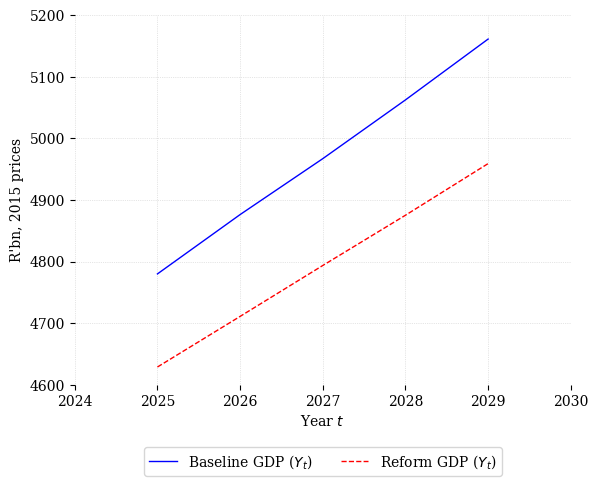

In [21]:
# plot in levels
BER_GDP = BER_gdp_forecast.loc[2025:, "Real GDP (R'bn, 2015 prices)"]
fig = op.plot_aggregates(
    base_tpi,
    base_params,
    reform_tpi=reform_tpi,
    reform_params=reform_params,
    var_list=["Y"],
    plot_type="forecast",
    num_years_to_plot=5,
    start_year=base_params.start_year,
    forecast_data=BER_GDP,
    forecast_units="R'bn, 2015 prices",
    )
fig.show()

In [ ]:
# Read in output from the g_y sim
sim_path = os.path.join(CUR_DIR, "OG-ZAF-gyup")
base_params = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_BASELINE", "model_params.pkl"
        )
    )
base_tpi = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_BASELINE", "TPI", "TPI_vars.pkl"
        )
    )
reform_params = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_REFORM", "model_params.pkl"
        )
    )
reform_tpi = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_REFORM", "TPI", "TPI_vars.pkl"
        )
    )

In [ ]:
# pp macro plot
# use a op function to plot pct diff in GDP, K, L
fig = op.plot_aggregates(
    base_tpi,
    base_params,
    reform_tpi=reform_tpi,
    reform_params=reform_params,
    var_list=["Y"],
    plot_type="pct_diff",
    num_years_to_plot=50,
    start_year=base_params.start_year
    )
fig.show()

In [ ]:
# pp macro plot with unstationarized
fig = op.plot_aggregates(
    base_tpi,
    base_params,
    reform_tpi=reform_tpi,
    reform_params=reform_params,
    var_list=["Y"],
    plot_type="pct_diff",
    stationarized=False,
    num_years_to_plot=50,
    start_year=base_params.start_year + 2
    )
fig.show()